In [1]:
from scipy import signal
import numpy as np
from matplotlib import pyplot as plt 
import control
import tikzmagic
%matplotlib inline

In [2]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

#### Modelagem inicial do sistema

Equações de Euler-Lagrange <br/>

\begin{align}
L & := T - V  \\ 
\end{align}
 
\begin{align}
\frac{d}{dt} \left(\frac{\partial L}{\partial \dot{q_i}} \right) - \frac{\partial L}{\partial q_i} = Q_i
\end{align}

Para o pêndulo temos $q$ como $x$ , que nos dará as equações de movimento em $x$ e para $q$ como $\theta$, que nos dará as equações de movimento para $\theta$ , logo precisaremos resolver ambas equações

\begin{align}
\frac{d}{dt} \left(\frac{\partial L}{\partial \dot{x}} \right) - \frac{\partial L}{\partial x} \\ \\
\frac{d}{dt} \left(\frac{\partial L}{\partial \dot{\theta}} \right) - \frac{\partial L}{\partial \theta}
\end{align}

Onde T é a energia cinética total do sistema e V a energia potencial, considerando o carro como V = 0, m,l,g,$\theta$ sendo respectivamente a massa, o comprimento do pêndulo, gravidade e o ângulo entre a vertical e o pêndulo, temos 

\begin{align}
V & = mgl cos \theta \\
\end{align}

Agora estamos interessados em calcular a energia cinética do sistema, tomando M como a massa total do carrinho, F como a força que empurra o carrinho, temos

\begin{align}
T & = \frac{1}{2}\left(M+m\right)\dot{x}^2 - m\dot{x}l\dot{\theta}cos\theta + \frac{1}{2}ml^2\dot{\theta}^2   \\
\end{align}

Logo 
\begin{align}
L & = \frac{1}{2}\left(M+m\right)\dot{x}^2 - m\dot{x}l\dot{\theta}cos\theta + \frac{1}{2}ml^2\dot{\theta}^2 -mglcos\theta  \\
\end{align}

Resolvendo as duas equações para $x$ e $\theta$ temos 

\begin{align}
(M+m)\ddot{x} + ml\dot{\theta}^2sen\theta - ml\ddot{\theta}cos\theta = F \\
\ddot{x}cos\theta + l\ddot{\theta} - gsen\theta = 0
\end{align}

Essa modelagem é para um pêndulo simples movido por um carrinho, para um sistema com pêndulo físico é necessário alguns ajustes, todos os ajustes e parâmetros apresentados a seguir foram tirados da tese http://ethesis.nitrkl.ac.in/2213/1/Inverted_Pendulum.pdf

\begin{align}
(M+m)\ddot{x} + b\dot{x} - ml\dot{\theta}^2sen\theta + ml\ddot{\theta}cos\theta = F \\
ml\ddot{x}cos\theta + (I + ml^2)\ddot{\theta} - mglsen\theta = 0
\end{align}

##### Fazendo a linearização sobre um ponto

\begin{align}
\theta = \Pi + \phi \\ 
\\
\end{align}
Sendo $\phi \approx 0$ podemos fazer a aproximação para ângulos pequenos
\begin{align}
\\
cos\phi = -1 \\
sen\phi = \phi \\
\dot{\theta} = 0 \\
\\
\end{align}
Depois da linearização temos
\begin{align}
(M+m)\ddot{x} + b\dot{x} -ml\dot{\phi} = u \\
(I + ml^2)\ddot{\phi} -mgl\phi - ml\ddot{x} = 0
\\
\end{align}
#### Laplace
\begin{align}
X(s)(M+m)s^2 + X(s)bs -\Phi(s)mls = U(s) \\
\Phi(s)(I + ml^2)s^2 -\Phi(s)mgls - X(s)mls^2 = 0
\\
\end{align}

#### Funções de Transferência

\begin{align}
\frac{X(s)}{U(s)} = \frac{(I + ml^2)s^2 - mgl}{ [(M+m)(I + ml^2) - ml^2]s^4 + b(I + mIl^2)s^3 - (M + m)mgls^2 -mglbs} \\
\\
\end{align}
\begin{align}
\frac{\Phi(s)}{U(s)} = \frac{\frac{ml}{q}s}{s^3 - \frac{b(I+ml^2)}{q}s^2 - \frac{(M+m)mgl}{q}s - \frac{bmgl}{q}}
\\
q := [(M+m)(I+ml^2) - ml^2]
\end{align}

Ignorando o atrito e aplicando os parâmetros

\begin{align}
\frac{X(s)}{U(s)} = \frac{b_2}{s^2} \\
\\
\end{align}
\begin{align}
\frac{\Phi(s)}{U(s)} = \frac{b_1}{s^2 - a_1^2}
\end{align}
Onde 

\begin{align}
\therefore && b_1 = 0.2570 &&
a_1 = 6.6307 && 
b_2 = 0.3802 & \implies
\frac{X(s)}{U(s)} = \frac{0.3802}{s^2} && \frac{\Phi(s)}{U(s)} = \frac{0.2570}{s^2 - 6.6307}
\end{align}

#### Pêndulo Invertido no domínio do tempo

Analisando separadamente a função de transferência para o ângulo 
\begin{align}
\\
\frac{\Phi(s)}{U(s)} = \frac{0.2570}{s^2 - 6.6307}
\end{align}

In [3]:
num = [0.2570]
den = [1,0,-6.6370]
ft_angulo = signal.TransferFunction(num, den)

#### Polos do sistema

In [4]:
polos = ft_angulo.poles
polos

array([ 2.57623757, -2.57623757])

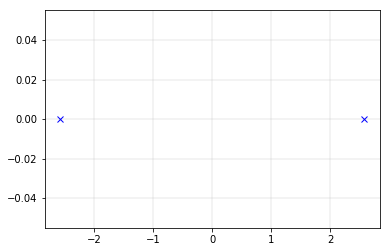

In [5]:
plt.grid(True,linewidth=.3)
[plt.plot(polo,0,'bx') for polo in polos]
plt.show()

##### Respostas ao degrau e ao impulso

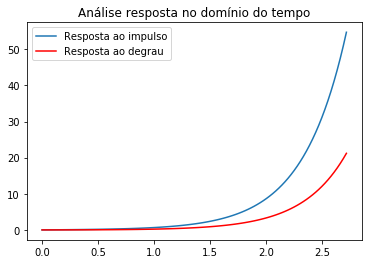

In [6]:
t,y = signal.impulse(ft_angulo)
t_degrau,y_degrau = signal.step(ft_angulo)
plt.plot(t,y)
plt.plot(t_degrau,y_degrau,'r')
plt.legend(['Resposta ao impulso','Resposta ao degrau'])
plt.title('Análise resposta no domínio do tempo')
plt.show()

#### Posição
Analisando agora a função de transferência para a posição 
\begin{align}
\\
\frac{X(s)}{U(s)} = \frac{0.3802}{s^2}
\end{align}

In [7]:
num2 = [0.3802]
den2 = [1,0,0]
ft_pos = signal.TransferFunction(num2, den2)

#### Polos do sistema

In [8]:
polos_posicao = ft_pos.poles
polos_posicao

array([ 0.,  0.])

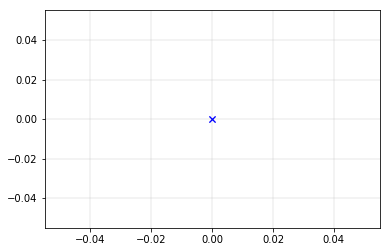

In [9]:
plt.grid(True,linewidth=.3)
[plt.plot(polo,0,'bx') for polo in polos_posicao]
plt.show()

##### Respostas ao degrau e ao impulso

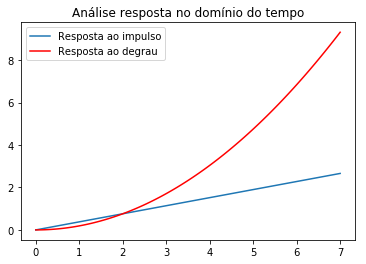

In [10]:
t_pos,y_pos = signal.impulse(ft_pos)
t_pos_degrau,y_pos_degrau = signal.step(ft_pos)
plt.plot(t_pos,y_pos)
plt.plot(t_pos_degrau,y_pos_degrau,'r')
plt.legend(['Resposta ao impulso','Resposta ao degrau'])
plt.title('Análise resposta no domínio do tempo')
plt.show()

#### Controle Pêndulo Invertido 

Analisando separadamente a função de transferência para o ângulo 
\begin{align}
\\
\frac{\Phi(s)}{U(s)} = \frac{0.2570}{s^2 - 6.6307}
\end{align}


In [11]:
roots_real = []
roots_img = []
colors_vec = []
ks = np.linspace(0,50,30)
for k in ks:
    tf = [1,0,0.2570*k - 6.6370]
    poles = np.roots(tf)
    [roots_real.append(pole.real) for pole in poles]
    [roots_img.append(pole.imag) for pole in poles]
    colors_vec.append(0)
    colors_vec.append(1)
           
def update_rootlocus(kp):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    colors = ['b','r']
    ax.grid(True)
    ax.set_ylim(-3,3)
    ax.set_xlim(-3,3)
    plt.scatter(2.57,0,s=150,c=colors[0],marker='X')
    plt.scatter(-2.57,0,s=150,c=colors[1],marker='X')
    for i in range(len(roots_real)):
        ax.plot(roots_real[i],roots_img[i],marker='x',c=colors[colors_vec[i]])
        
    tf_interact = [1,0,0.2570*kp - 6.6370]
    poles_interact = np.roots(tf_interact)
    is_real_interact = np.isreal(poles_interact[0])
    if is_real_interact:
        for i,pole in enumerate(poles_interact):
            ax.scatter(pole,0,s=150,marker='o',c=colors[i])
    else:
        for i,pole in enumerate(poles_interact):
            ax.scatter(pole.real,pole.imag,s=150,marker='o',c=colors[i])
    legend_1 = str(round(poles_interact[0].real,3)) + ' + ' + str(round(poles_interact[0].imag,3))  + 'j'
    legend_2 = str(round(poles_interact[1].real,3)) + ' + ' + str(round(poles_interact[1].imag,3))  + 'j'
    ax.legend([legend_1,legend_2])
    plt.show()

interact(update_rootlocus,kp=(-5,50,1))

A Jupyter Widget

<function __main__.update_rootlocus>

#### Usando a biblioteca de controle do python

In [12]:
G = control.TransferFunction(1,[1,0,-6.6370])
G


     1
-----------
s^2 - 6.637

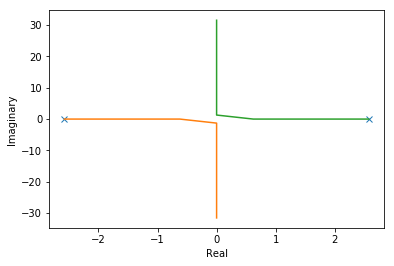

In [13]:
rlist,klist = control.root_locus(G)

#### Controle PID

In [14]:
from control import tf,feedback,step_response,impulse_response

In [15]:
def pzmap(transfer_function):
    # plot the poles and zeros of the transfer function
    poles = transfer_function.pole()
    zeros = transfer_function.zero() 
    plt.xlim(20,-20)
    plt.ylim(20,-20)
    [plt.scatter(pole.real,pole.imag,marker='X') for pole in poles]
    [plt.scatter(zero.real,zero.imag,marker='o') for zero in zeros]
    plt.grid()
    plt.show()
    
def _step(transfer_function):
    # plot the step response for the transfer function
    T, yout = step_response(transfer_function)
    plt.plot(T,yout)
    plt.show()

In [126]:
# PID ISA Kc (1 + 1/(Ti * s) + Td * s )

colors = ['rosybrown','olivedrab','darkgoldenrod','lightslategray']
# (ajustar cores para cada caminho)
# (botão para atualizar o step response)
# Root loci just for k > 0 ? 
def test_PID(K,Ti,Td,points,step_function,show_zeros_and_poles):
    roots_real = []
    roots_img = []
    color_vector = []
    Kcs = np.linspace(0,250,points)
    s = tf([1,0],1)
    G = (0.2570)/(s**2 - 6.6370)
    for Kc in Kcs:
        if(Ti == 0):
            Gc = Kc*(1 + s*Td)
        else:
            Gc = Kc*(1 + s*Td + 1/(Ti*s))
        closed_loop_tf = feedback(Gc*G,1)
        poles = closed_loop_tf.pole()
        how_many_poles = len(poles)
        counter = 0
        if(how_many_poles > 0):
            for i,pole in enumerate(poles):
                roots_real.append(poles[i].real)
                roots_img.append(poles[i].imag)
                color_vector.append(colors[counter])
                counter += 1
                if(counter == how_many_poles): counter = 0
    
    fig = plt.figure()
    if(step_function):
        ax = fig.add_subplot(211)
        ax2 = fig.add_subplot(212)
        ax2.grid(True)
    else:
        ax = fig.add_subplot(111)
    ax.grid(True)
    ax.set_ylim(-5,5)
    ax.set_xlim(-5,5)
    for i in range(len(roots_real)):
        ax.scatter(roots_real[i],roots_img[i],marker='x',s=20,color=color_vector[i])
    
    if(K != 0):
        if(Ti == 0):
            Gc = K*(1 + s*Td)
        else:
            Gc = K*(1 + s*Td + 1/(Ti*s))
        closed_loop_tf = feedback(Gc*G,1)
        _poles = closed_loop_tf.pole()
        _zeros = closed_loop_tf.zero()
        [ax.scatter(pole.real,pole.imag,marker='X',s=100,color='black') for pole in _poles]
        [ax.scatter(zero.real,zero.imag,marker='o',s=100,color='darkgreen') for zero in _zeros]
        if(step_function):
            T, yout = step_response(closed_loop_tf)
            ax2.plot(T,yout)
        total_number_of_poles_and_zeros = len(_poles) + len(_zeros)
        legends = []
        [legends.append(str(round(pole.real,3)) + ' + ' + str(round(pole.imag,3))  + 'j') for pole in _poles]
        [legends.append(str(round(zero.real,3)) + ' + ' + str(round(zero.imag,3))  + 'j') for zero in _zeros]
        if(show_zeros_and_poles): ax.legend(legends)

interact(test_PID,K=(-50,500,.2),Ti=(-50,50,.2),Td=(-50,50,.2),points=(10,100,1),
         step_function = widgets.Checkbox(
                                            value=False,
                                            description='Resposta ao Degrau',
                                            disabled=False
                                        ),
         show_zeros_and_poles = widgets.Checkbox(
                                            value=True,
                                            description='Mostrar polos e zeros',
                                            disabled=False
                                        ),
        )


A Jupyter Widget

<function __main__.test_PID>

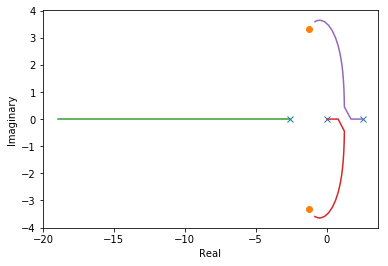

In [70]:
s = tf([1,0],1)
Kc = 0.2
Ti = 0.2
Td = 0.4
G = (0.2570)/(s**2 - 6.6370)
Gc = Kc*(1 + s*Td + 1/(Ti*s))
closed_loop_tf = feedback(Gc*G,1)
k,t = control.rlocus(closed_loop_tf)

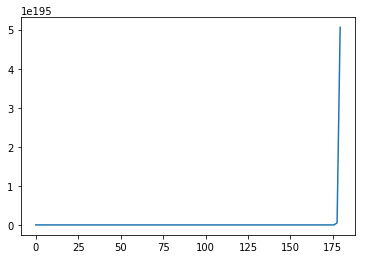

(array([-2.59576124,  2.53616291,  0.03903833]),
 array([-1.25+3.30718914j, -1.25-3.30718914j]))

In [71]:
_step(closed_loop_tf)
closed_loop_tf.pole(),closed_loop_tf.zero()

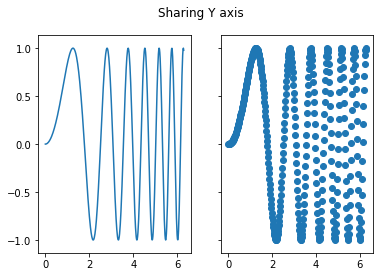

In [85]:
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)
ax1.plot(x, y)
ax2.scatter(x, y)